<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.3/chap3_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chap. 3**

*   Tensor operation

In [ ]:
import tensorflow as tf

a=tf.constant([1,2])
print(tf.rank(a))

In [ ]:
import tensorflow as tf
import numpy as np

a=tf.constant(3)
b=tf.constant(2)

print(tf.add(a,b))
print(tf.subtract(a,b))
print(tf.multiply(a,b).numpy())  # numpy array형태로 출력
print(tf.divide(a,b).numpy())

In [ ]:
c=tf.add(a,b).numpy()
c_square=np.square(c,dtype=np.float32)
c_tensor=tf.convert_to_tensor(c_square)

print('numpy array: %.0f, applying square with numpy: %.1f, convert to tensor: %.1f' % (c,c_square,c_tensor))
print(c_tensor)

*   @tf.function

In [ ]:
import tensorflow as tf

@tf.function
def square_pos(x):
  if x>0:
    x=x*x
  else:
    x*=-1
  return x

print(square_pos(tf.constant(2)))

*   perceptron

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(777)

# prepare data
data=np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label=np.array([[0],[1],[1],[1]])

# construct a model
model=Sequential()

# single layered perceptron
model.add(Dense(1,input_shape=(2,),activation='linear'))

# prepare a model
model.compile(optimizer=SGD(),loss=mse,metrics=['acc'])

# start learning
model.fit(data,label,epochs=500)
weights,biases=model.get_weights()
print('weights=',weights)
print('biases=',biases)
model.summary()



*   XOR gate 구현
*   Multilayer perceptron
> tf.matmul 사용하여 matrix multiplication





In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.losses import mse

tf.random.set_seed(777)

# prepare data
data=np.array([[0,0],[1,0],[0,1],[1,1]])
label=np.array([[0],[1],[1],[0]])

model=Sequential()
model.add(Dense(32,input_shape=(2,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss=mse,metrics=['acc'])

model.fit(data,label,epochs=100)

# weights1,weights2,biases1,biases2=model.get_weights()
# print('weights1=',weights1)
# print('biases1=',biases1)
# print('weights2=',weights2)
# print('biases2=',biases2)

model.summary()
model.evaluate(data,label)
result=model.predict(data)
print(result)

Test learning rate in gradient decent

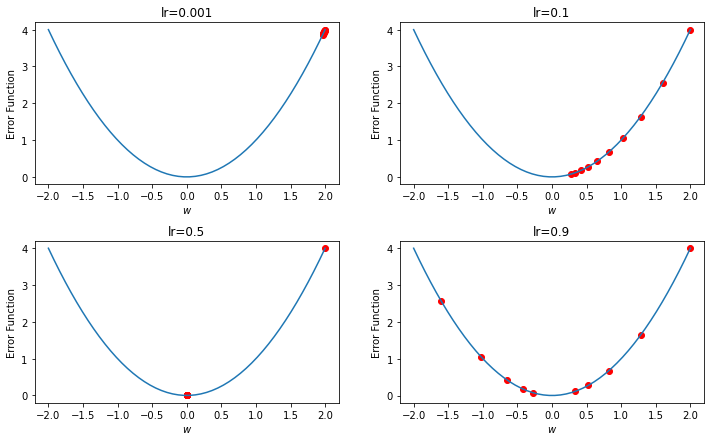

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lr_list=[0.001,0.1,0.5,0.9]

def grad_decent(lr):
  w=2
  weight=[w]

  y=[w**2]

  for i in range(1,10):
    dev_value=2*w
    w-=lr*dev_value
    weight.append(w)
    y.append(w**2)

  return weight,y

x=np.linspace(-2,2,50)
x_square=x**2

fig=plt.figure(figsize=(12,7))

for i,lr in enumerate(lr_list):
  weight,y=grad_decent(lr)
  ax=fig.add_subplot(2,2,i+1)
  ax.scatter(weight,y,color='red')
  ax.plot(x,x_square)
  ax.title.set_text('lr='+str(lr))
  plt.xlabel(r'$w$')
  plt.ylabel(r'Error Function')
  plt.subplots_adjust(hspace=0.35)
plt.show()